Task 1 - Exploration of customer purchasing behavior

Exploratory data analysis is the lifeblood of every meaningful machine learning project. It helps us unravel the nature of the data and sometimes informs how you go about modeling. A careful exploration of the data encapsulates checking all available features, checking their interactions and correlation as well as their variability with respect to the target. 

In this task, you seek to explore the behaviour of customers in the various stores. Our goal is to check how some measures such as promos and opening of new stores affect purchasing behavior. 

To achieve this goal, you need to first clean the data. The data cleaning process will involve building pipelines to detect and handle outlier and missing data. This is particularly important because you don’t want to skew our analysis. 

Visualizing various features and interactions is necessary for clearly communicating our findings. It is a powerful tool in the data science toolbox. Communicate the findings below via the necessary plots.

You can use the following questions as a guide during your analysis. It is important to come up with more questions to explore. This is part of our expectation for an excellent analysis.



In [11]:
# import necessary modules
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import os,sys
sys.path.append(os.path.abspath(os.path.join('..')))
from Scripts.EDA import EDA
from Scripts.Clean import Clean
sns.set()
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None  # default='warn'
plt.rcParams["figure.figsize"] = (12, 8)
pd.set_option('display.max_columns', None)

Cleaning the Data

In [12]:
os.listdir()


['cleantest.csv',
 'cleantrain.csv',
 'ExploratoryDataAnalysis.ipynb',
 'store.csv',
 'test.csv',
 'train.csv']

In [13]:
missing_values = ["n/a", "na", "undefined"]
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
store = pd.read_csv("store.csv",na_values=missing_values)
train.tail()

c:\Users\RYZEN\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [14]:
test.tail()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
41083,41084,1111,6,2015-08-01,1.000,0,0,0
41084,41085,1112,6,2015-08-01,1.000,0,0,0
41085,41086,1113,6,2015-08-01,1.000,0,0,0
41086,41087,1114,6,2015-08-01,1.000,0,0,0
41087,41088,1115,6,2015-08-01,1.000,0,0,1


In [15]:
store.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.000,6.000,2014.000,1,31.000,2013.000,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.000,4.000,2006.000,0,nan,nan,NaN
1112,1113,a,c,9260.000,nan,nan,0,nan,nan,NaN
1113,1114,a,c,870.000,nan,nan,0,nan,nan,NaN
1114,1115,d,c,5350.000,nan,nan,1,22.000,2012.000,"Mar,Jun,Sept,Dec"


Cleaning the train dataset.

In [16]:
clean_df = Clean(train)
clean_df.merge_df(store,'Store')

[25/May/2022 18:17:07] INFO - Successfully initialized clean class
[25/May/2022 18:17:08] INFO - Successfully merged the dataframe


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.000,9.000,2008.000,0,nan,nan,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.000,11.000,2007.000,1,13.000,2010.000,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.000,12.000,2006.000,1,14.000,2011.000,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.000,9.000,2009.000,0,nan,nan,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.000,4.000,2015.000,0,nan,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.000,6.000,2014.000,1,31.000,2013.000,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.000,4.000,2006.000,0,nan,nan,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.000,nan,nan,0,nan,nan,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.000,nan,nan,0,nan,nan,NaN


In [17]:
clean_df.drop_missing_values()


[25/May/2022 18:17:09] INFO - NumExpr defaulting to 8 threads.
[25/May/2022 18:17:09] INFO - Successfully dropped the columns with missing values


In [18]:
clean_df.fix_outliers('Sales',25000)

[25/May/2022 18:17:09] INFO - Successfully stored the features
[25/May/2022 18:17:09] INFO - Successfully handled outliers


In [19]:
clean_df.remove_unnamed_cols()

[25/May/2022 18:17:09] INFO - Successfully removed columns with head unnamed


In [20]:
clean_df.transfrom_time_series("Store","Date")

[25/May/2022 18:17:10] INFO - Successfully transformed data to time series data


In [21]:
clean_df.save(name="cleantrain.csv")

[25/May/2022 18:17:16] INFO - Successfully saved the dataframe


Cleaning test data

In [22]:
clean_df = Clean(test)

[25/May/2022 18:17:17] INFO - Successfully initialized clean class


In [23]:
clean_df.merge_df(store,'Store')

[25/May/2022 18:17:17] INFO - Successfully merged the dataframe


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.000,1,0,0,c,a,1270.000,9.000,2008.000,0,nan,nan,NaN
1,2,3,4,2015-09-17,1.000,1,0,0,a,a,14130.000,12.000,2006.000,1,14.000,2011.000,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.000,1,0,0,a,c,24000.000,4.000,2013.000,0,nan,nan,NaN
3,4,8,4,2015-09-17,1.000,1,0,0,a,a,7520.000,10.000,2014.000,0,nan,nan,NaN
4,5,9,4,2015-09-17,1.000,1,0,0,a,c,2030.000,8.000,2000.000,0,nan,nan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.000,0,0,0,a,a,1900.000,6.000,2014.000,1,31.000,2013.000,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.000,0,0,0,c,c,1880.000,4.000,2006.000,0,nan,nan,NaN
41085,41086,1113,6,2015-08-01,1.000,0,0,0,a,c,9260.000,nan,nan,0,nan,nan,NaN
41086,41087,1114,6,2015-08-01,1.000,0,0,0,a,c,870.000,nan,nan,0,nan,nan,NaN


In [24]:
clean_df.drop_missing_values()

[25/May/2022 18:17:17] INFO - Successfully dropped the columns with missing values


In [25]:
clean_df.fix_outliers('Sales',25000)

[25/May/2022 18:17:17] INFO - Successfully stored the features
[25/May/2022 18:17:17] INFO - Successfully handled outliers


In [26]:
clean_df.remove_unnamed_cols()

[25/May/2022 18:17:18] INFO - Successfully removed columns with head unnamed


In [27]:
clean_df.transfrom_time_series("Store","Date")

[25/May/2022 18:17:18] INFO - Successfully transformed data to time series data


In [28]:
clean_df.get_df().drop('Id',axis=1,inplace=True)

In [29]:
clean_df.save(name="cleantest.csv")

[25/May/2022 18:17:18] INFO - Successfully saved the dataframe


In [30]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.mode.chained_assignment = None  # default='warn'
#plt.rcParams["figure.figsize"] = (12, 8)
pd.set_option('display.max_columns', None)

In [31]:
train= pd.read_csv("cleantrain.csv")
test= pd.read_csv("cleantest.csv")


In [35]:
eda_train= EDA(train)
eda_test= EDA(test)

[25/May/2022 18:18:30] INFO - Successfully initialized eda class
[25/May/2022 18:18:30] INFO - Successfully initialized eda class


- Id - an Id that represents a (Store, Date) duple within the test set
- Store - a unique Id for each store
- Sales - the turnover for any given day (this is what you are predicting)
- Customers - the number of customers on a given day
- Open - an indicator for whether the store was open: 0 = closed, 1 = open
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state 
holidays. Note that all schools are closed on 
public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
- StoreType - differentiates between 4 different store models: a, b, c, d
- Assortment - describes an assortment level: a = basic, b = extra, c = extended. Read more about assortment here
- CompetitionDistance - distance in meters to the nearest competitor store
- CompetitionOpenSince[Month/Year] - gives the approximate year and month of 
the time the nearest competitor was opened
- Promo - indicates whether a store is running a promo on that day
- Promo2 - Promo2 is a continuing and consecutive promotion for some 
stores: 0 = store is not participating, 1 = store is participating
- Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion 
is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, 
November of any given year for that store

In [36]:
eda_train.descriptive_stats(size=True)

[25/May/2022 18:18:36] INFO - Successfully performed shape


(324275, 22)

In [37]:
eda_test.descriptive_stats(size=True)

[25/May/2022 18:19:11] INFO - Successfully performed shape


(14832, 20)

In [38]:
# descriptive statistics that summarize the central tendency, dispersion of the df's numerical columns
eda_train.descriptive_stats(describe=True)

[25/May/2022 18:19:41] INFO - Successfully performed describe


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Day,Month,Year,DayOfYear,WeekOfYear
count,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000,324275.000
mean,558.935,3.999,5395.470,553.712,0.826,0.381,0.175,4284.873,7.191,2008.195,1.000,22.144,2011.856,15.699,5.749,2013.828,159.293,23.204
std,327.250,1.997,3485.730,361.167,0.379,0.486,0.380,5248.863,3.251,7.425,0.000,13.550,1.675,8.786,3.304,0.787,100.923,14.329
min,2.000,1.000,0.000,0.000,0.000,0.000,0.000,40.000,1.000,1900.000,1.000,1.000,2009.000,1.000,1.000,2013.000,1.000,1.000
25%,276.000,2.000,3527.000,369.000,1.000,0.000,0.000,600.000,4.000,2005.000,1.000,13.000,2011.000,8.000,3.000,2013.000,75.000,11.000
50%,563.000,4.000,5466.000,557.000,1.000,0.000,0.000,2230.000,7.000,2009.000,1.000,18.000,2012.000,16.000,5.000,2014.000,149.000,22.000
75%,848.000,6.000,7452.000,748.000,1.000,1.000,0.000,5630.000,10.000,2012.000,1.000,37.000,2013.000,23.000,8.000,2014.000,236.000,34.000
max,1111.000,7.000,24979.000,3200.000,1.000,1.000,1.000,27190.000,12.000,2015.000,1.000,48.000,2015.000,31.000,12.000,2015.000,365.000,52.000


In [39]:
eda_test.descriptive_stats(describe=True)

[25/May/2022 18:21:26] INFO - Successfully performed describe


,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,Day,Month,Year,DayOfYear,WeekOfYear
count,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000,14832.000
mean,570.689,3.979,0.850,0.396,0.470,3895.405,7.100,2008.223,1.000,23.608,2011.935,13.521,8.354,2015.000,236.500,34.646
std,322.627,2.016,0.357,0.489,0.499,4883.423,3.217,8.112,0.000,13.791,1.690,8.449,0.478,0.000,13.854,2.016
min,3.000,1.000,0.000,0.000,0.000,40.000,1.000,1900.000,1.000,1.000,2009.000,1.000,8.000,2015.000,213.000,31.000
25%,302.000,2.000,1.000,0.000,0.000,600.000,4.000,2006.000,1.000,13.000,2011.000,6.750,8.000,2015.000,224.750,33.000
50%,590.000,4.000,1.000,0.000,0.000,2070.000,7.000,2010.000,1.000,22.000,2012.000,12.500,8.000,2015.000,236.500,35.000
75%,848.000,6.000,1.000,1.000,1.000,5100.000,10.000,2012.000,1.000,37.000,2013.000,19.250,9.000,2015.000,248.250,36.000
max,1111.000,7.000,1.000,1.000,1.000,27190.000,12.000,2015.000,1.000,48.000,2015.000,31.000,9.000,2015.000,260.000,38.000


Check for distribution in both training and test sets -
are the promotions distributed similarly between these two groups?

[25/May/2022 18:22:32] INFO - Successfully plotted distributions in the histogram formats


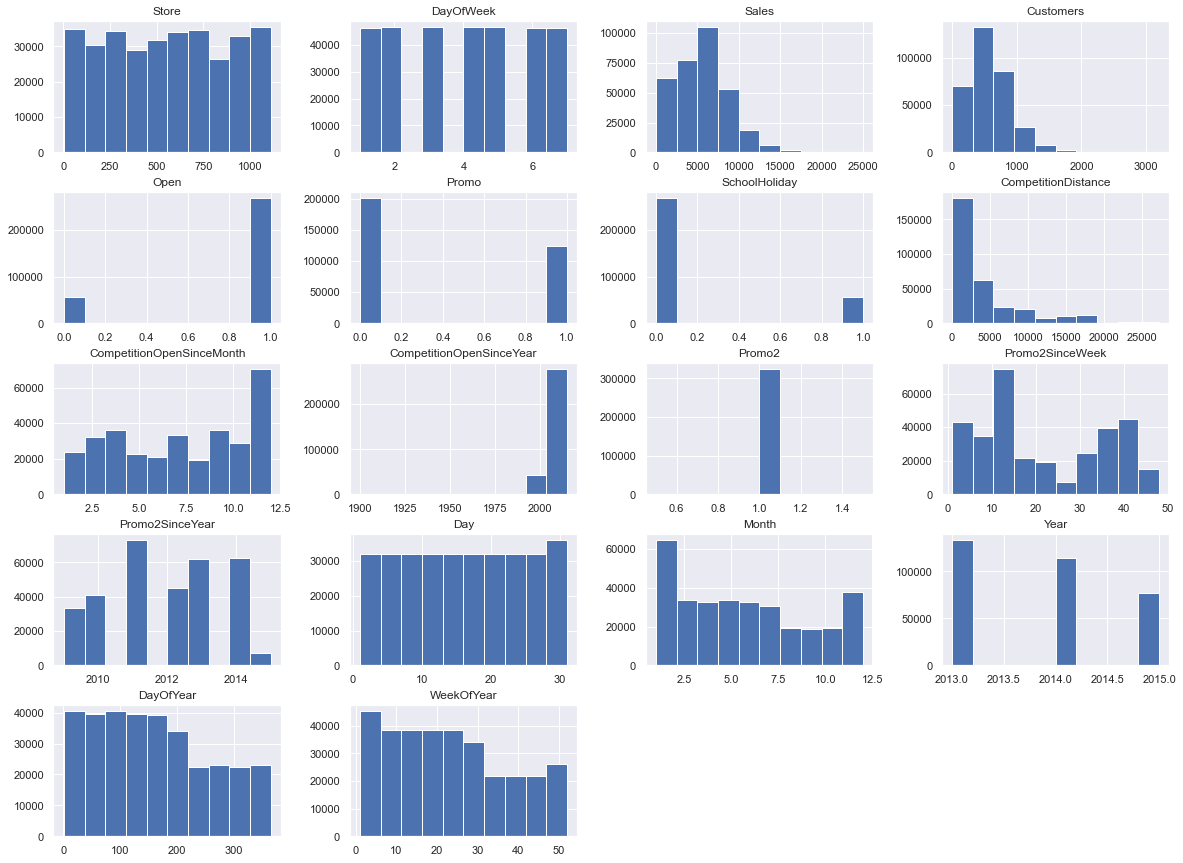

In [40]:
eda_train.plot_distributions()

[25/May/2022 18:23:43] INFO - Successfully plotted distributions in the histogram formats


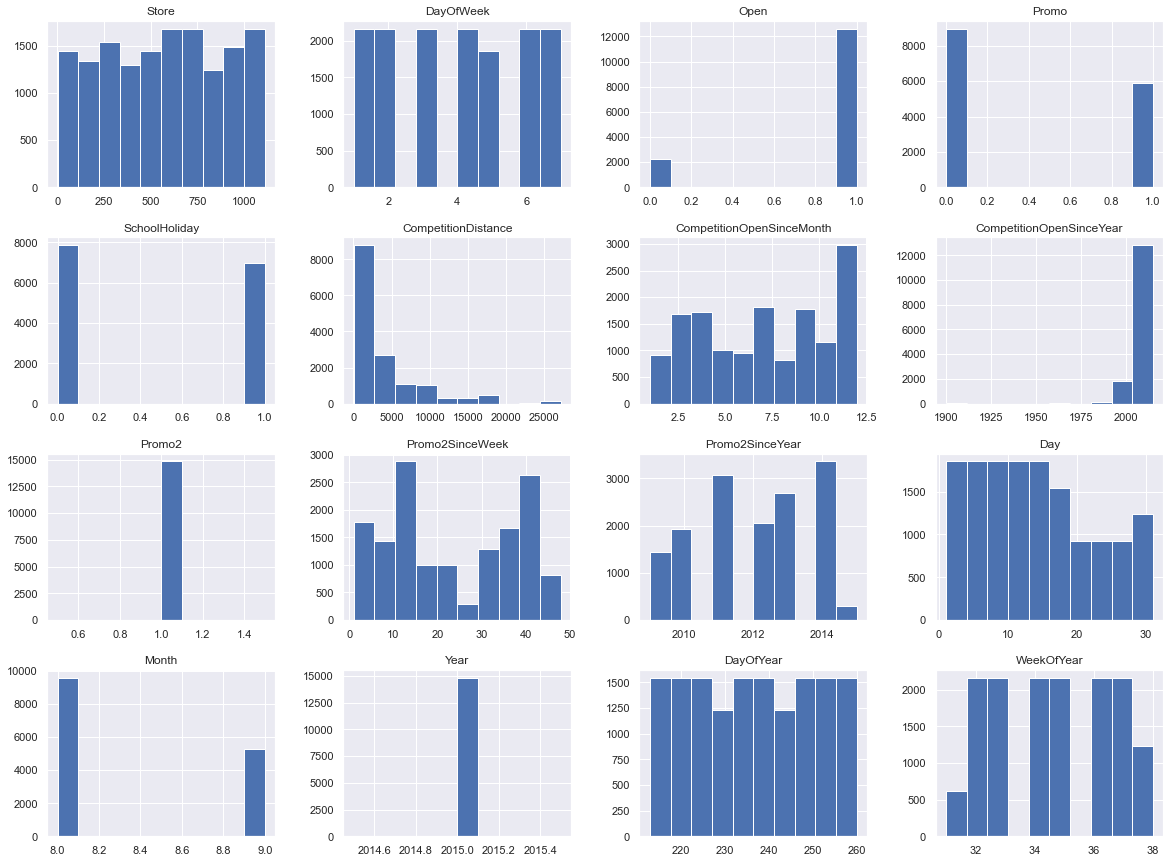

In [41]:
eda_test.plot_distributions()

No,not similar, explain